/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


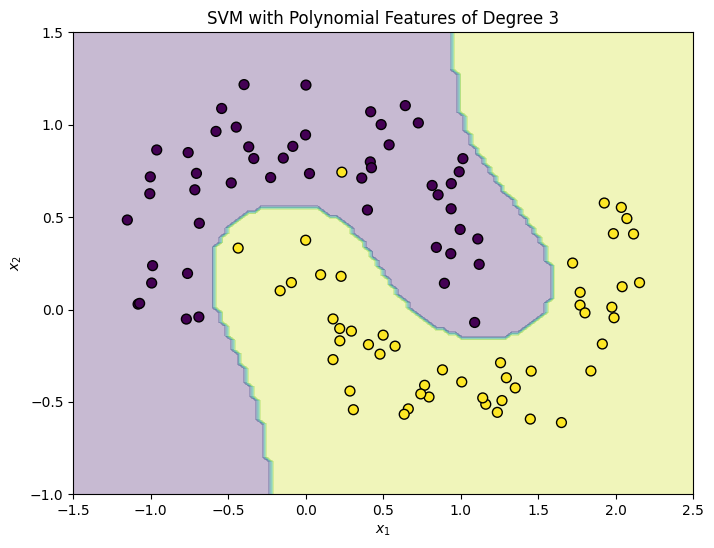

In [8]:
# Import necessary libraries
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

# Create a sample dataset (replace this with your actual data)
X, y = make_moons(n_samples=100, noise=0.15)  # Generates a dataset with two classes in a moon shape

# Create a pipeline for the SVM model with polynomial features
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),  # Add polynomial features of degree 3
    ('scaler', StandardScaler()),  # Scale features to have mean 0 and variance 1
    ('svm_clf', LinearSVC(C=10, loss='hinge'))  # Create a linear SVM classifier with hard margin
])

# Train the model with the data
polynomial_svm_clf.fit(X, y)

# To visualize the model, first we need to create a mesh grid of points
def plot_decision_boundary(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_predict, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.xlim(axes[0], axes[1])
    plt.ylim(axes[2], axes[3])

# Define the axis limits for the plot
axes = [-1.5, 2.5, -1, 1.5]

# Plot the data and the decision boundary of the model
plt.figure(figsize=(8, 6))
plot_decision_boundary(polynomial_svm_clf, X, y, axes)
plt.title("SVM with Polynomial Features of Degree 3")
plt.show()


In [10]:
# Kernel poli
from sklearn.svm import SVC # Import the SVC class
poly_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
        ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

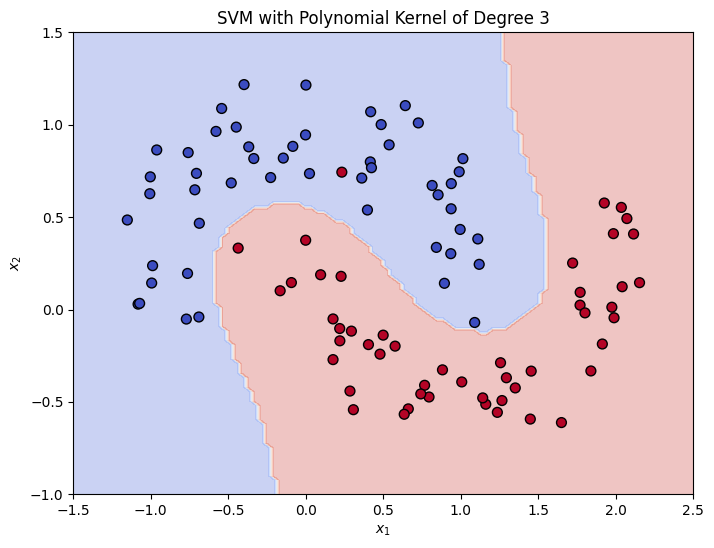

In [11]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_predict, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap='coolwarm')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.xlim(axes[0], axes[1])
    plt.ylim(axes[2], axes[3])

# Define axis limits for the plot
axes = [-1.5, 2.5, -1, 1.5]

# Plot the data and the decision boundary of the model
plt.figure(figsize=(8, 6))
plot_decision_boundary(poly_kernel_svm_clf, X, y, axes)
plt.title("SVM with Polynomial Kernel of Degree 3")
plt.show()
